# Chapter 8: Advanced Data Analysis
In the last few chapters, we have become comfortable with the idea of building our own functions. These can become quite complex, as we have learned with the construction of the OLS regression in chapter 7. We will continue developing our tool set for working with and managing large sets of data by integrating data from different data sets. We will introduce the multi index to facilitate this process. Among other things, the multi index is useful for including identifiers across time and region or principality. We will also use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a Double Index to Work with Panel Data
In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

### Plotting with Double Index
We will be working with two datasets in the next example: the [Fraser Economic Freedom Index](https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0&year=2017) and GDP from the [Maddison Project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018).

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

In [1]:
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# index_col = [0,2] will select  countrycode as the primary index and year as 
# the secondary index
data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])

View the new dataframe by entering data in the console:

In [2]:
data

country  cgdppc  rgdpnapc      pop         i_cig  \
countrycode year                                                         
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN   
            1870  Afghanistan     NaN       NaN   4207.0           NaN   
            1913  Afghanistan     NaN       NaN   5730.0           NaN   
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated   
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated   
            1952  Afghanistan  2462.0    2462.0   8425.0  Extrapolated   
            1953  Afghanistan  2568.0    2568.0   8573.0  Extrapolated   
            1954  Afghanistan  2576.0    2576.0   8728.0  Extrapolated   
            1955  Afghanistan  2579.0    2579.0   8891.0  Extrapolated   
            1956  Afghanistan  2644.0    2644.0   9062.0  Extrapolated   
            1957  Afghanistan  2593.0    2593.0   9241.0  Extrapolated   
            1958  Afghanistan  2684.0    2684.0   9429.0  Extrapolated   
            1959  Afghanistan  2705.0    2705.0   9625.0  Extrapolated   
            1960  Afghanistan  2744.0    2744.0   9829.0  Extrapolated   
            1961  Afghanistan  2708.0    2708.0  10043.0  Extrapolated   
            1962  Afghanistan  2695.0    2695.0  10267.0  Extrapolated   
            1963  Afghanistan  2683.0    2683.0  10501.0  Extrapolated   
            1964  Afghanistan  2673.0    2673.0  10744.0  Extrapolated   
            1965  Afghanistan  2670.0    2670.0  10998.0  Extrapolated   
            1966  Afghanistan  2633.0    2633.0  11262.0  Extrapolated   
            1967  Afghanistan  2642.0    2642.0  11538.0  Extrapolated   
            1968  Afghanistan  2670.0    2670.0  11825.0  Extrapolated   
            1969  Afghanistan  2646.0    2646.0  12123.0  Extrapolated   
            1970  Afghanistan  2632.0    2632.0  12431.0  Extrapolated   
            1971  Afghanistan  2560.0    2560.0  12749.0  Extrapolated   
            1972  Afghanistan  2086.0    2086.0  13079.0  Extrapolated   
            1973  Afghanistan  2091.0    2091.0  13421.0  Extrapolated   
            1974  Afghanistan  2149.0    2149.0  13772.0  Extrapolated   
            1975  Afghanistan  2225.0    2225.0  14132.0  Extrapolated   
            1976  Afghanistan  2286.0    2286.0  14501.0  Extrapolated   
...                       ...     ...       ...      ...           ...   
ZWE         1987     Zimbabwe  3243.0    2070.0   9216.0  Interpolated   
            1988     Zimbabwe  3340.0    2182.0   9560.0  Interpolated   
            1989     Zimbabwe  3369.0    2252.0   9868.0  Interpolated   
            1990     Zimbabwe  3265.0    2232.0  10156.0  Interpolated   
            1991     Zimbabwe  3280.0    2292.0  10437.0  Interpolated   
            1992     Zimbabwe  2845.0    2030.0  10720.0  Interpolated   
            1993     Zimbabwe  2749.0    2004.0  10976.0  Interpolated   
            1994     Zimbabwe  2913.0    2167.0  11086.0  Interpolated   
            1995     Zimbabwe  2841.0    2156.0  11159.0  Interpolated   
            1996     Zimbabwe  3032.0    2346.0  11317.0  Interpolated   
            1997     Zimbabwe  3013.0    2377.0  11469.0  Interpolated   
            1998     Zimbabwe  3006.0    2417.0  11607.0  Interpolated   
            1999     Zimbabwe  2889.0    2367.0  11733.0  Interpolated   
            2000     Zimbabwe  2696.0    2249.0  11820.0  Interpolated   
            2001     Zimbabwe  2624.0    2228.0  11868.0  Interpolated   
            2002     Zimbabwe  2376.0    2054.0  11866.0  Interpolated   
            2003     Zimbabwe  1958.0    1722.0  11816.0  Interpolated   
            2004     Zimbabwe  1813.0    1622.0  11735.0  Interpolated   
            2005     Zimbabwe  1660.0    1510.0  11639.0  Interpolated   
            2006     Zimbabwe  1587.0    1467.0  11544.0  Interpolated   
            2007     Zimbabwe  1522.0    1431.0  11443.0  Interpolated   
            2008     Zimba

When working with a multi index, calling the values from a single index requires a few steps. If you were to call data.index in the console, both the countrycode and the year values would be returned:

In [3]:
data.index

MultiIndex(levels=[['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSK', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SRB', 'STP', 

To call only the year values from the multi index, we use the dataframe method, *.get_level_values(“year”)*. This returns the same list, but with only years:

In [4]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

Since we don’t need to hold every repeated year value, only the full range years present in the data set. We will remove an repeated values from the list and then ensure that the list is in order:

In [5]:
#multiIndex.py
# . . . 
# to gather all of the years, we group observations by year, 
# which will remove the other column of the multiindex 
years = data.groupby("year").mean().index

Once you understand the structure of the index, you may find it easier to call all of the commands in one line:

In [6]:
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

The data set has relatively few observations for data before the modern era. Before 1800, even for the years that have entries, data for most countries is not present.

Next, we create a dictionary with tuples containing codes for each pair of countries whose real GDP per capita we will compare. The first pair is Canada and Finland, the second pair is France and Germany, and the third pair is Great Britain and the Netherlands. The first country in each pair will be represented by the linestyle *“-”* and the second pair by the linestyle *“--”*.

In [7]:
#multiIndex.py
# . . . 
# pairs of countries to compare in plots
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("GBR", "NLD")]
linestyles = ["-", ":"]

 Now that the dictionary has been prepared, cycle through each pair of countries in the dictionary. Using a for loop, we select one  of these at a time with an accompanying linestyle. The code of the country calls the Real GDP data using the command *data.ix[(country),:]["cgdppc"]*. This selects data by index according to country and includes all years, as is indicated by the colon in the second part of the index entry. Last, the column *“cgdppc”* is selected. Conveniently, we can also use the code stored in country as the label.
 
Script in lines 27-30 continue to adjust the plot. The command *plt.xlim(xmin, xmax)* selects the range of the x-axis. Only data from 1825 to the most recent observation, identified by *max(years)*, is included in the plot. The *plt.rcParams.update()* commands adjust fontsizes by accessing default parameter in matplotlib. Finally, the create a title that uses latex text by including “$text$”. This italicizes the title text and allows for the use latex commands such as subscripting, greek letters, etc....

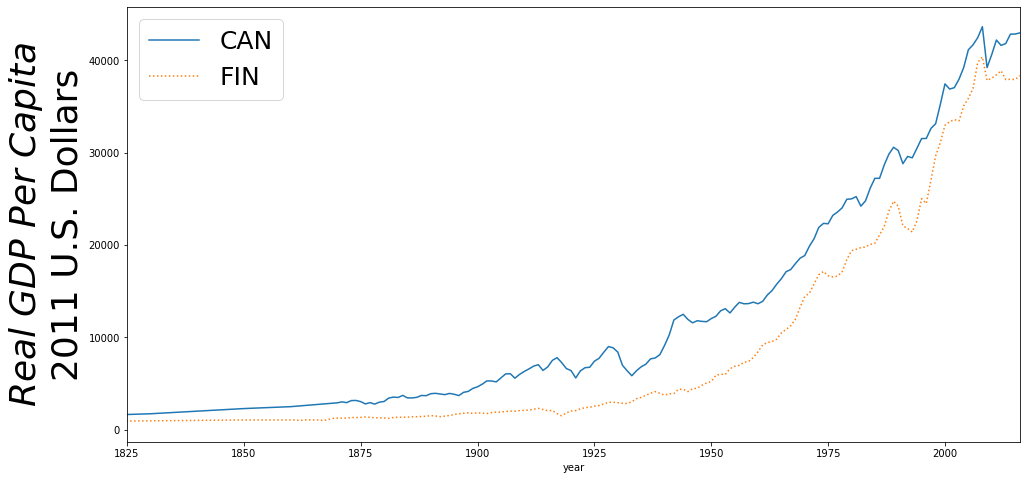

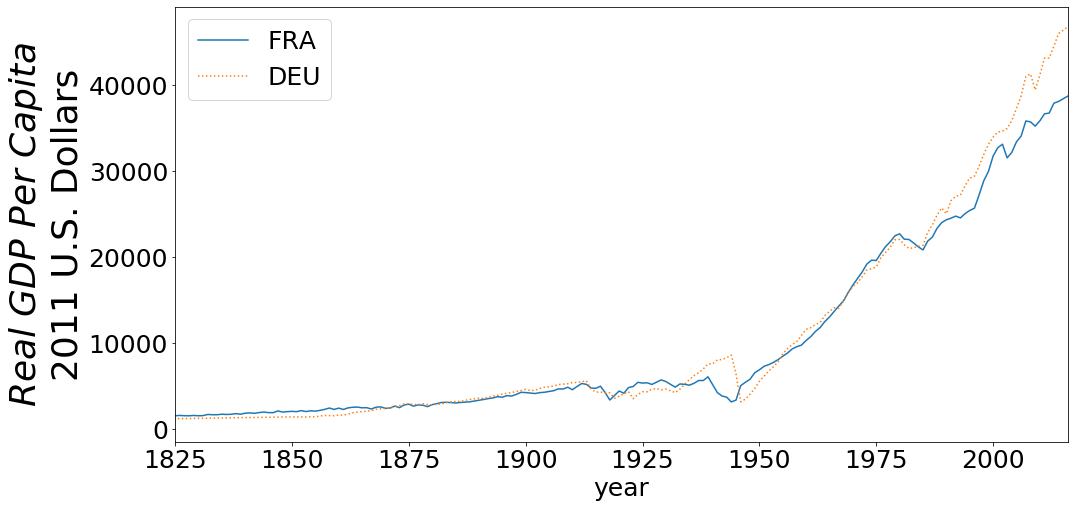

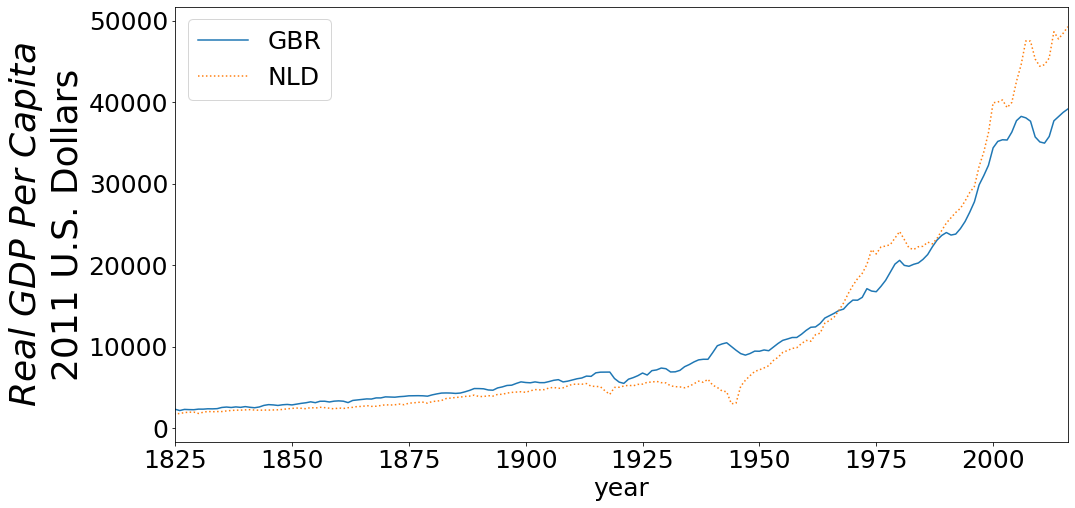

In [8]:
#multiIndex.py
# . . .
  
for pair in pairs:  
    fig, ax = plt.subplots(figsize=(16,8))  
    for i in range(len(pair)):  
        country = pair[i]  
        linestyle = linestyles[i]  
        data.loc[country,:]["cgdppc"].dropna(
        ).plot.line(ax = ax,  
               label = country, linestyle = linestyle)  
    plt.xlim([1825, max(years)])  
    plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
    plt.rcParams.update({"font.size": 25})  
    plt.ylabel(
        "$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars",
        fontsize=36)  
    plt.legend()  
    plt.show()  
    plt.close()  

### Merge Data Sets with Double Index
Next, we will import both sets of data as unique objects with the intention of combining them. First, we must successful import the Fraser Index. Unlike with other files we have imported, the column names are in the third row and the years are in the second column. Finally, we will call the *.dropna()* method twice to drop any row *(axis = 0)* and then any column *(axis=1)* with missing observations:

In [9]:
#dataForPanel.py  
import pandas as pd  
 
#make sure dates are imported in the same format; to do this,  
#we turned off parse_dates  
fraser_data = pd.read_excel("efw-2019-master-index-data-for-researchers.xlsx",  
                           sheet_name = "EFW Panel Data 2019 Report",  
                           header = [2], index_col = [2, 1], parse_dates=False)  
# drop any empty column and any empty row  
fraser_data = fraser_data.dropna(
    axis=0, thresh=1).dropna(axis=1, thresh=1)  
  
maddison_data = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data",   
                              index_col = [0,2])#, parse_dates = True)  


The object fraserData is imported from the sheet #“EFW Index 2018 Report”#. The 1st and 0th columns are used as index columns in that order, respectively. The object maddisonData is imported from the sheet #“Full data”#. The 0th and 2nd columns columns are used as index columns. The double index of both dataframes refers to the #ISO_Code# (#countrycode#) and the year. Since the objects referred to by the indices match, we will be able to use the double index associated with a particular entry to refer to another double index.

Since both dataframes employ the same double index format, we can copy any column from one dataframe to the other. We will copy for the Maddison GDP data to the Fraser Economic Freedom Index data.

In [10]:
#dataForPanel.py
# . . . 
fraser_data["RGDP Per Capita"] = maddison_data["cgdppc"]
fraser_data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                              
ALB      2017   Albania  7.673511               7.528167   
         2016   Albania  7.637742               7.875862   
         2015   Albania  7.639666               7.904257   
         2014   Albania  7.586769               7.882037   
         2013   Albania  7.389525               7.807904   
         2012   Albania  7.332332               8.096375   
         2011   Albania  7.381064               7.820966   
         2010   Albania  7.380725               7.839664   
         2009   Albania  7.313856               7.785948   
         2008   Albania  7.276252               8.189874   
         2007   Albania  7.258078               8.633510   
         2006   Albania  7.148669               8.039787   
         2005   Albania  6.985649               8.031015   
         2004   Albania  6.858749               7.397515   
         2003   Albania  7.031750               7.832298   
         2002   Albania  6.516060               7.700479   
         2001   Albania  6.322281               7.272991   
         2000   Albania  6.296170               7.260723   
         1995   Albania  5.041307               6.222428   
         1990   Albania  4.347428               3.338928   
         1985   Albania       NaN                    NaN   
         1980   Albania       NaN                    NaN   
         1975   Albania       NaN                    NaN   
         1970   Albania       NaN                    NaN   
DZA      2017   Algeria  4.763472               3.577033   
         2016   Algeria  5.030748               3.716934   
         2015   Algeria  4.794132               3.200157   
         2014   Algeria  5.136326               3.983687   
         2013   Algeria  5.167820               4.035976   
         2012   Algeria  5.003921               3.453623   
...                 ...       ...                    ...   
ZMB      1995    Zambia  4.418360               5.895636   
         1990    Zambia  2.870869               3.638100   
         1985    Zambia  3.286548               2.885189   
         1980    Zambia  4.269533               2.345607   
         1975    Zambia  3.709106               2.288363   
         1970    Zambia       NaN                    NaN   
ZWE      2017  Zimbabwe  5.699539               5.491676   
         2016  Zimbabwe  6.033204               5.926764   
         2015  Zimbabwe  6.145330               6.402772   
         2014  Zimbabwe  5.582478               6.433165   
         2013  Zimbabwe  5.246723               6.325105   
         2012  Zimbabwe  4.971192               6.670469   
         2011  Zimbabwe  4.843441               6.424630   
         2010  Zimbabwe  4.374917               6.514112   
         2009  Zimbabwe  4.314332               7.369615   
         2008  Zimbabwe  4.491870               7.070748   
         2007  Zimbabwe  3.204629               5.970748   
         2006  Zimbabwe  3.012548               4.770748   
         2005  Zimbabwe  2.889240               4.291101   
         2004  Zimbabwe  3.181057               5.184469   
         2003  Zimbabwe  3.675260               5.709175   
         2002  Zimbabwe  3.625483               5.514469   
         2001  Zimbabwe  3.633489               5.547411   
         2000  Zimbabwe  4.299839               5.365058   
         1995  Zimbabwe  5.518614               6.418859   
         1990  Zimbabwe  4.516140               5.108843   
         1985  Zimbabwe  4.226841               5.026250   
         1980  Zimbabwe  4.054740               6.322625   
         1975  Zimbabwe       NaN                    NaN   
         1970  Zimbabwe       NaN                    NaN   

               2  Legal System & Property Rights  3  Sound Money  \
ISO_Code Year                                                      
ALB      2017                           5.064907        9.648271   
         2016                

Now that the dataset has been transferred, we can save the result as a csv so that we can call it again in later examples. RGDP Per Capita is shown in the last column of the new csv file:

In [11]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

### Creating Indicator Variables
Suppose that we wanted to test the idea that geography influences economic growth. We would need to clarify a hypothesis concerning this. We might believe, for example, that countries in North America tend to have a distinct real gross domestic product than in other continents i.e., real GDP tends to be higher or lower due to residing in North America. To represent this, we would create an indicator variable named *“North America”*. Countries residing in North America would be indicated with a  1 (i.e., True), and those outside of North America would receive a zero.

To accomplish this task is straightforward if you know the appropriate commands to use. As usual, we import the data. Before creating an indicator variable, you will need to choose the name that will reference the indicator variable, indicator_name, and make a list of the index values, *target_index_list* that will be recorded as possessing the attribute referred to by the indicator variable. Finally, you will need to choose the name of the index column that includes the elements in the *target_index_list*. If you are not sure what this name is, you can check the names of the index columns using *df.index.names*.

In [12]:
#indicatorVariable.py
import pandas as pd  
  
def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# Import data with "ISO_Code" and "Year" as index columns  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
  
# select "ISO_Code" from names of double index  
index_name = data.index.names[0]  
indicator_name = "North America"  
# Cuba, Grenada, Saint Kitts, Saint Lucia, Saint Vincent are missing   
# from Fraser Data  
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)

Once the new column of data has been creative, it can be called by passing indicator¬¬_name to the dataframe. Be sure to use double brackets (i.e., *[[ , ]]*) so that the column names are included in the output. 

In [13]:
data[["North America"]]

North America
ISO_Code Year                     
ALB      2017-01-01              0
         2016-01-01              0
         2015-01-01              0
         2014-01-01              0
         2013-01-01              0
         2012-01-01              0
         2011-01-01              0
         2010-01-01              0
         2009-01-01              0
         2008-01-01              0
         2007-01-01              0
         2006-01-01              0
         2005-01-01              0
         2004-01-01              0
         2003-01-01              0
         2002-01-01              0
         2001-01-01              0
         2000-01-01              0
         1995-01-01              0
         1990-01-01              0
         1985-01-01              0
         1980-01-01              0
         1975-01-01              0
         1970-01-01              0
DZA      2017-01-01              0
         2016-01-01              0
         2015-01-01              0
         2014-01-01              0
         2013-01-01              0
         2012-01-01              0
...                            ...
ZMB      1995-01-01              0
         1990-01-01              0
         1985-01-01              0
         1980-01-01              0
         1975-01-01              0
         1970-01-01              0
ZWE      2017-01-01              0
         2016-01-01              0
         2015-01-01              0
         2014-01-01              0
         2013-01-01              0
         2012-01-01              0
         2011-01-01              0
         2010-01-01              0
         2009-01-01              0
         2008-01-01              0
         2007-01-01              0
         2006-01-01              0
         2005-01-01              0
         2004-01-01              0
         2003-01-01              0
         2002-01-01              0
         2001-01-01              0
         2000-01-01              0
         1995-01-01              0
         1990-01-01              0
         1985-01-01              0
         1980-01-01              0
         1975-01-01              0
         1970-01-01              0

[3888 rows x 1 columns]

It is useful to represent discrete variabls, like the indicator variable for "North America", by color in a scatter plot. If there is a difference means between two groups, it is often apparrent when data is visualized by color. In the case of the "North America" indicator variable, the difference in means between the groups does not appear to be causal (statistically significant), as we will show later in the chapter.

We use  "North America" as the variable indicating color in the scatter plot. 

Text(0.5, 1.0, '2000')

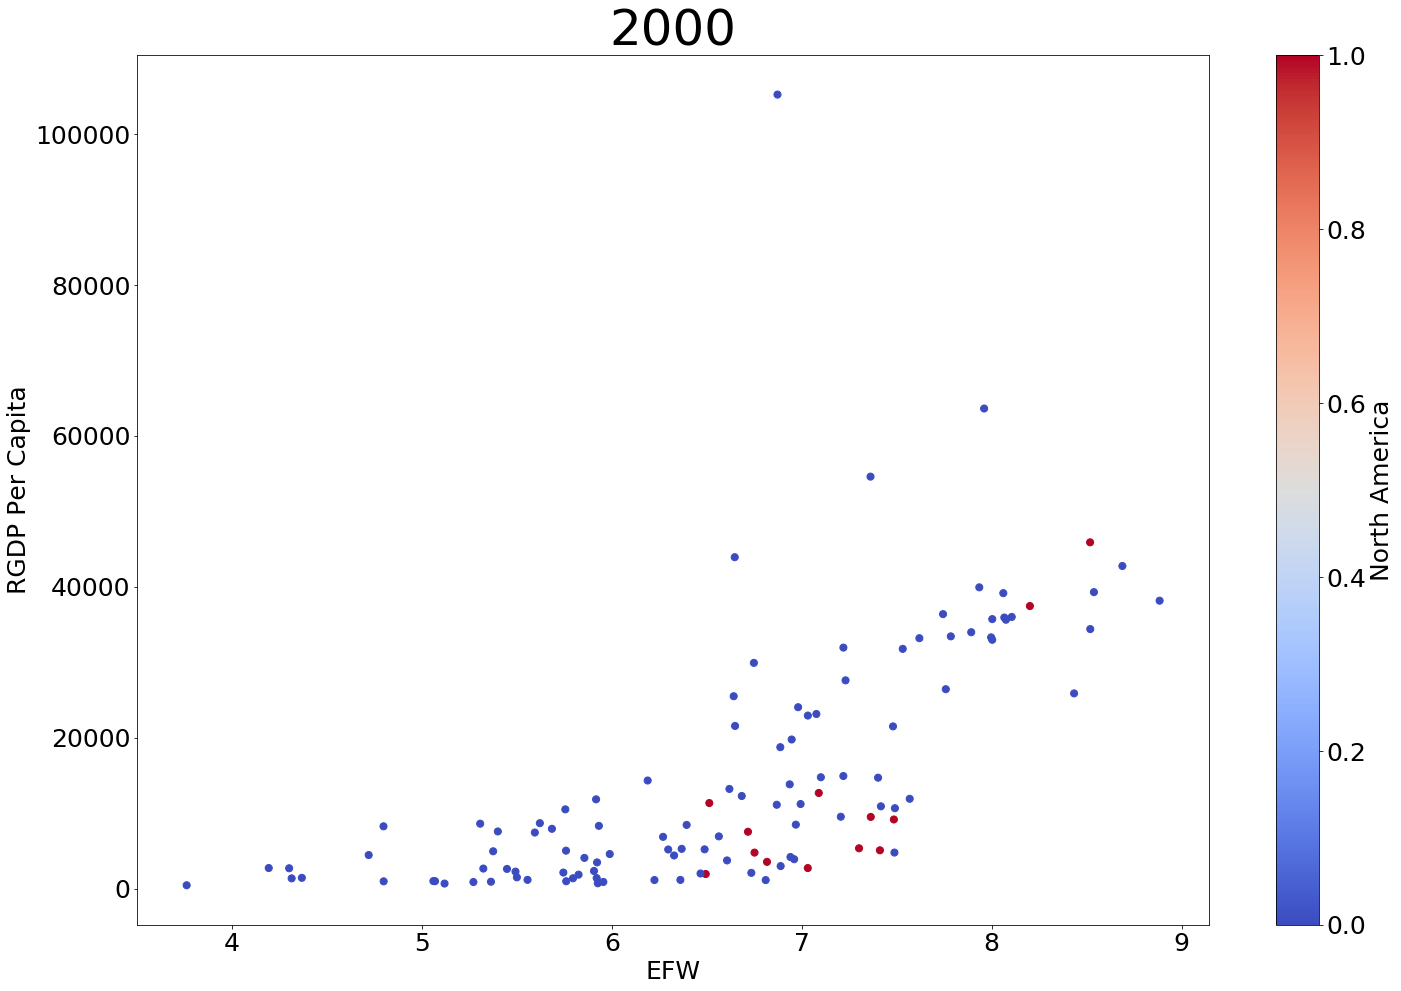

In [14]:
import datetime
year = 2000

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", c = "North America",
                      cmap = "coolwarm", ax = ax, s = 50)
ax.set_title(str(year), fontsize = 50)

[0.  0.2 0.4 0.6 0.8 1. ]


Text(0.5, 1.0, '2000')

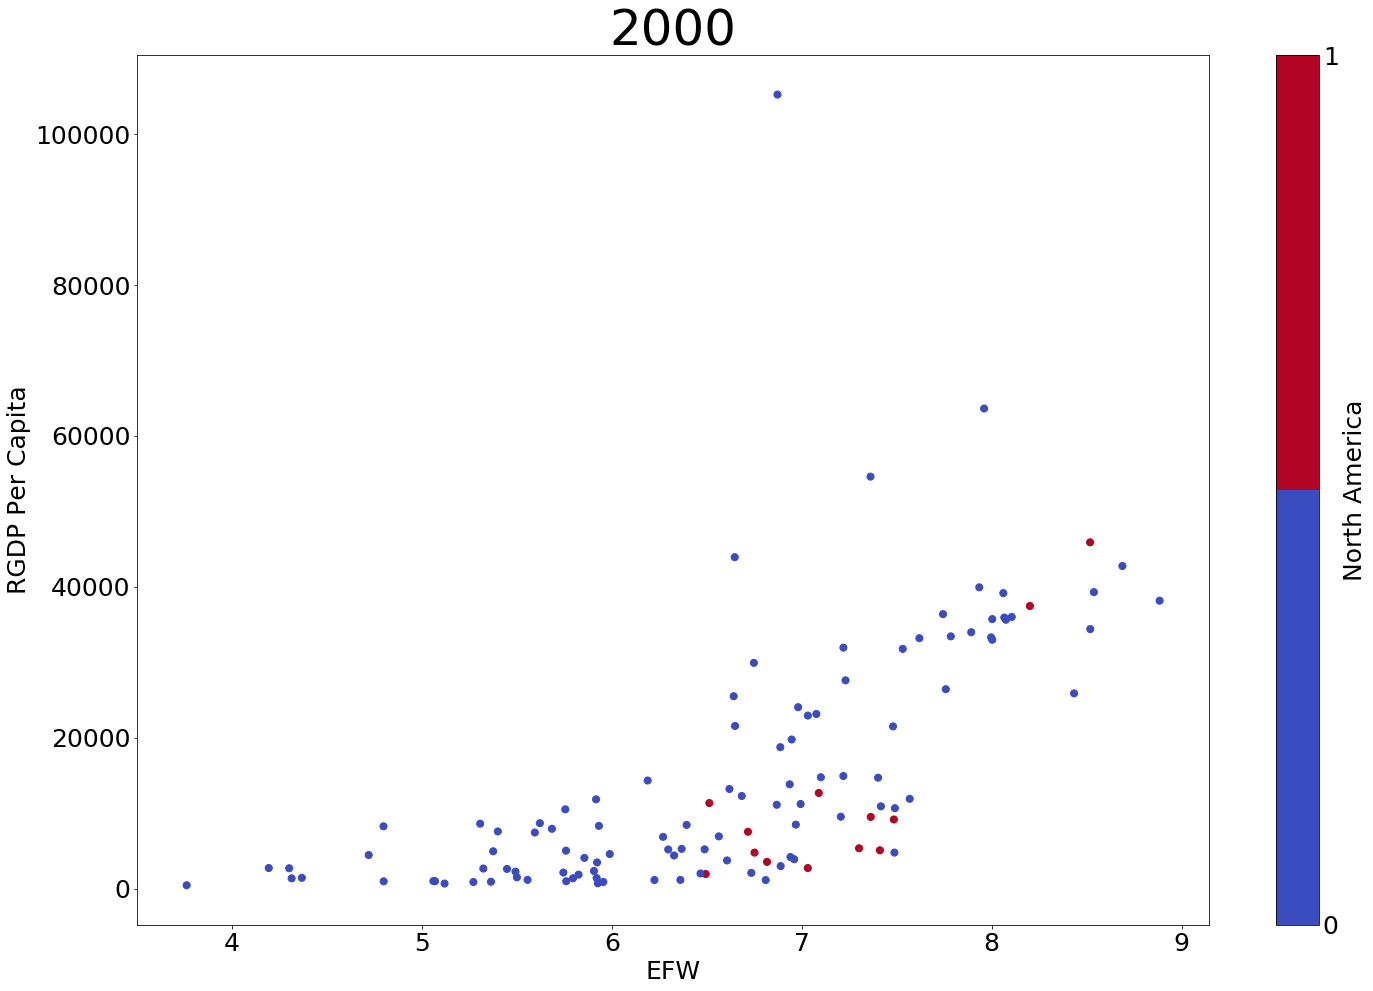

In [15]:
import datetime
from matplotlib import cm

year = 2000
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", c = "North America",
                      cmap = cmap, ax = ax, norm = norm, s = 50)

# to remove numbers between 0 and 1, access the color axis through plt.gcf()
f = plt.gcf()
cax  = f.get_axes()[1]
# access colorbar values
vals = cax.get_yticks()
print(vals)
# only include 0 or 1
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
# remove tick lines from color axis
cax.tick_params(length = 0)

ax.set_title(str(year), fontsize = 50)

### Create Quantile Ranking
Similar to the pervious exercise, we may categorize data according ranked bins. This is accomplished by separating data into quantiles, often in the form of quartiles or quintiles, however this can be accomplished using any number of divisions. The following script allows you to create quantiles of the number of divisions of your choosing.

First, we need to import the data that we have merged. Once the dataframe is created, we must prepare a place for quantile data to be registered. Out of convenience, we will refer to the n-tile, meaning that a quartile will be labeled a “4-tile”, a quintile will be label a “5-tile”, and so forth. Before recording the data, we will create blank entries using *np.nan*.

In [16]:
#quantile.py  
import pandas as pd  
import numpy as np  

# choose numbers of divisions  
n = 5  
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
#create column identifying n-tile rank  
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

Now that the dataframe has been prepped, we can create function that will record quantile values. Since the data frame includes data for nearly every country over many years, we will want to choose one of the index categories to identify quantiles. We prefer to compare countries,  8so unique quantile measures will compare countries in a given year. We will build a list of years and use a for-loop to cycle through values in the list. For each year, we will construct a quantile values comparing countries within the year.

The *create_quantile()* function needs to be provided the number of divisions within a quantile (*n*), the dataframe (*data*), the year to which the quantile measure refers (*year*), the variable for which the quantile is constructed (*quantile_var*), and the key that will refer to the quantile data (*quantile_name*).

First, we construct the year_index. This provides a slice of the original index that includes only the years of interest. Next, we identify the value that divides each quantile. The pandas dataframe has a convenient command, *df.quantile(percent)*, that will calculate the value  for a particular percentile. For example, *df.quantile(.25)* will calculate the value representing the 25th percentile. A quantile is comprised of divisions whose size is a fraction of 1 and that sum to one. The value that divides each quantile is defined by *i/n*  where *n* is the number of quartiles, and 
*i* includes all integers from 1 up to and including *n*.

Now that the values dividing each quantile for a given year have been identified, we can check which in which quantile each country falls. Cycle through the index for the year with for index in *data[year_index].index*. This allows us to calls up each individual countries data for the given year, compare that data of the category of interest to the quantile values, and select the identify quantile that the nation falls in for the year.

In [17]:
#quantile.py  
import pandas as pd  
import numpy as np  
  
def create_quantile(n, data, year, quantile_var, quantile_name):  
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)}  
    # cycle through each country for a given year  
    for index in data[year_index].index:  
        # identtify value of the variable of interest  
        val = data.loc[index][quantile_var]  
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            # if the value is less than the highest in the quantile identified,  
            # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                #exit loop  
                break  
            # otherwise check the higest value of the next quantile  
            else:  
                 continue  

# . . .
years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

Now call "RGDP Per Capita" alongside the quantile rankings.

In [18]:
data[["RGDP Per Capita", "RGDP Per Capita 5-tile"]]

RGDP Per Capita  RGDP Per Capita 5-tile
ISO_Code Year                                               
ALB      2017-01-01              NaN                     NaN
         2016-01-01          11285.0                     3.0
         2015-01-01          10947.0                     3.0
         2014-01-01          10703.0                     3.0
         2013-01-01          10138.0                     3.0
         2012-01-01          10344.0                     3.0
         2011-01-01           9484.0                     3.0
         2010-01-01           9324.0                     3.0
         2009-01-01           9373.0                     3.0
         2008-01-01           8617.0                     3.0
         2007-01-01           7673.0                     3.0
         2006-01-01           7111.0                     3.0
         2005-01-01           6499.0                     3.0
         2004-01-01           6094.0                     3.0
         2003-01-01           5804.0                     3.0
         2002-01-01           5489.0                     3.0
         2001-01-01           5409.0                     3.0
         2000-01-01           5183.0                     3.0
         1995-01-01           4685.0                     3.0
         1990-01-01           4099.0                     4.0
         1985-01-01           3593.0                     4.0
         1980-01-01           3501.0                     4.0
         1975-01-01           3363.0                     3.0
         1970-01-01           2957.0                     3.0
DZA      2017-01-01              NaN                     NaN
         2016-01-01          13328.0                     3.0
         2015-01-01          13024.0                     3.0
         2014-01-01          12782.0                     3.0
         2013-01-01          12998.0                     3.0
         2012-01-01          13242.0                     3.0
...                              ...                     ...
ZMB      1995-01-01            981.0                     5.0
         1990-01-01           1369.0                     5.0
         1985-01-01           1770.0                     5.0
         1980-01-01           1462.0                     5.0
         1975-01-01           2059.0                     4.0
         1970-01-01           2031.0                     4.0
ZWE      2017-01-01              NaN                     NaN
         2016-01-01           1729.0                     5.0
         2015-01-01           1759.0                     5.0
         2014-01-01           1797.0                     5.0
         2013-01-01           1801.0                     5.0
         2012-01-01           1623.0                     5.0
         2011-01-01           1515.0                     5.0
         2010-01-01           1425.0                     5.0
         2009-01-01           1329.0                     5.0
         2008-01-01           1260.0                     5.0
         2007-01-01           1522.0                     5.0
         2006-01-01           1587.0                     5.0
         2005-01-01           1660.0                     5.0
         2004-01-01           1813.0                     5.0
         2003-01-01           1958.0                     4.0
         2002-01-01           2376.0                     4.0
         2001-01-01           2624.0                     4.0
         2000-01-01           2696.0                     4.0
         1995-01-01           2841.0                     4.0
         1990-01-01           3265.0                     4.0
         1985-01-01           3615.0                     4.0
         1980-01-01           4003.0                     3.0
         1975-01-01           4142.0                     3.0
         1970-01-01           3448.0                     3.0

[3888 rows x 2 columns]

Again, let's identify each quantile by color. We will use code slightly different from the last time. Since the values cover a greater range, all we need to  do is shift the min and max values of the color axis.

Text(0.5, 1.0, 'Year: 2000')

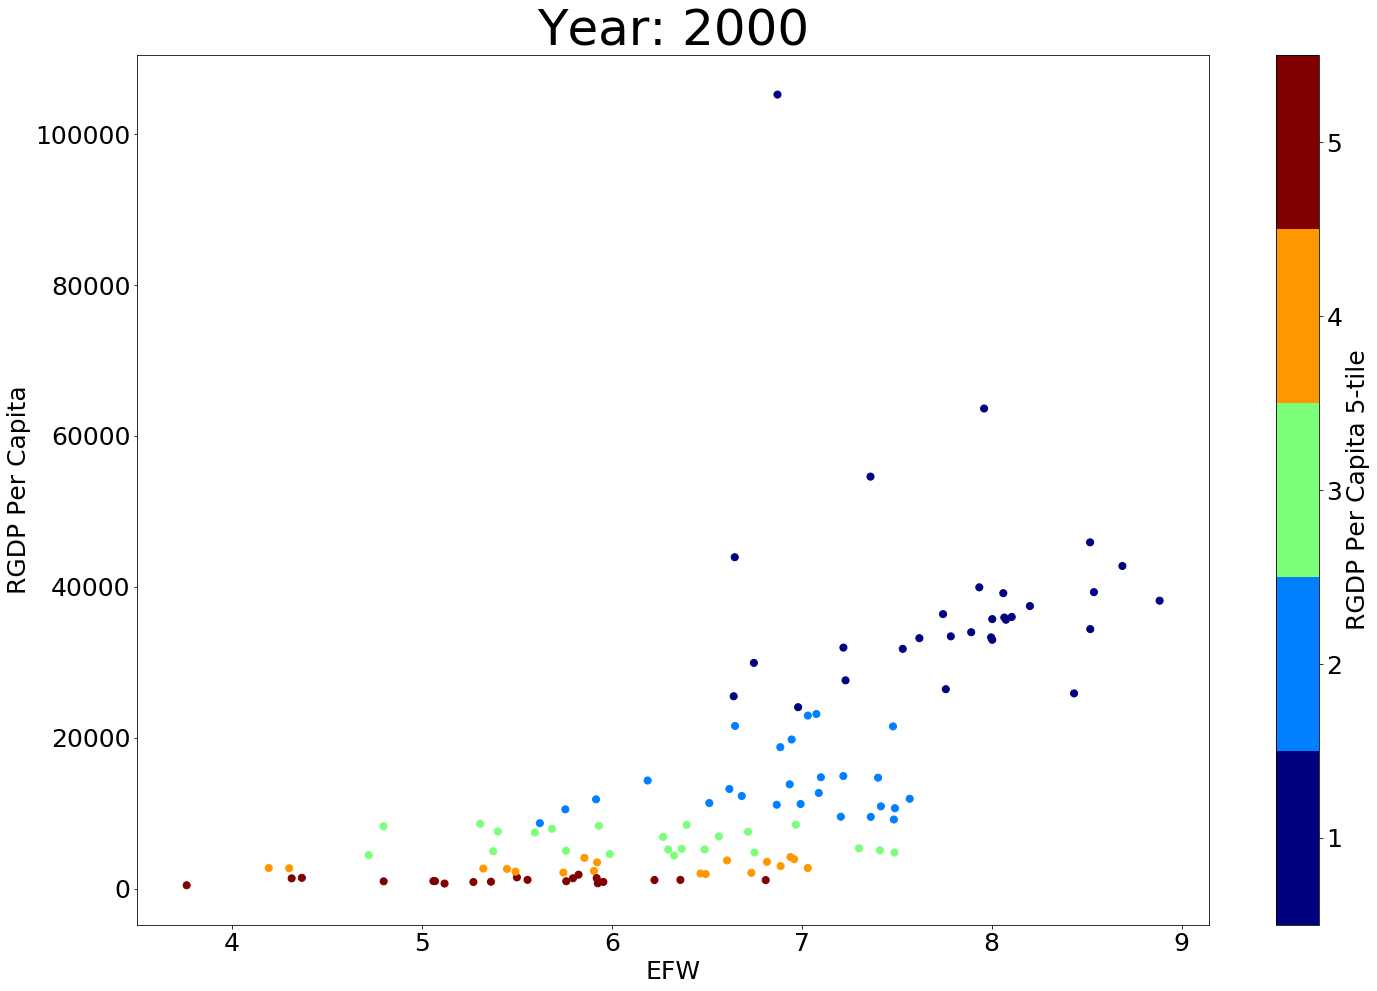

In [19]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2000
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap, norm = norm,  ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

### Lag Variables and Differenced Log Values

With time series data, it is often useful to control for trends when data is autocorrelated. Consider, for example, that real GDP data is often highly correlated with values from the previous period. We might detect a false causal relationship between two variables that are actually unrelated but follow a similar trend. For example, we might regress your age against real GDP and find that there is a strong correlation between the two. To avaoid false positives like this, it is useful to account for the influence of lagged values and/or to detrend the data all together by using differenced logs.

Creating lag variables is quite simple if the index is already recognized as containing dates and times. The method, *df.shift(n)* accomplishes this. Pass a negative value to create a lagged variable from n periods previous and a positive value to create a variable that refers to data n periods in the future.

Because we are using a double index, we must specify to which index we must instruct Pandas as to which index the shift refers. We accomplish this by using *.groupby(level)* to target the index column that does not refer to a datetime data. This will group the data by entity, thus leaving only the date column to be referenced by *.shift(n)*. Since we only want a lag value from the period that immediately preceded the observation, *n=-1*.

In [20]:
#logAndDifferenceData.py  
import pandas as pd  
import numpy as np  
import datetime  
  
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)


To understand what the command yielded, we will want to view data for an individual country. The following command will save *“RGDP Per Capita”* in the United States and the lag of that value to a csv file:

In [21]:
data.loc["USA", :]

,Countries,EFW,1 Size of Government,2 Legal System & Property Rights,3 Sound Money,4 Freedom to trade internationally,5 Regulation,RGDP Per Capita,RGDP Per Capita Lag
Year,,,,,,,,,
2017-01-01,United States,8.196365,7.157599,7.436473,9.799038,7.674580,8.914133,NaN,53015.0
2016-01-01,United States,8.183442,7.138582,7.396209,9.847874,7.653328,8.881217,53015.0,52591.0
2015-01-01,United States,8.085664,7.121655,7.226306,9.761051,7.535949,8.783357,52591.0,51664.0
2014-01-01,United States,7.969703,7.126057,7.099625,9.389649,7.573566,8.659619,51664.0,50863.0
2013-01-01,United States,7.900998,7.097752,6.974508,9.420297,7.374713,8.637721,50863.0,50394.0
2012-01-01,United States,8.012288,7.565472,7.016540,9.323542,7.699527,8.456360,50394.0,49675.0
2011-01-01,United States,7.906265,7.260760,6.957723,9.305630,7.711284,8.295927,49675.0,49267.0
2010-01-01,United States,7.972577,7.108888,7.143095,9.678239,7.720760,8.211905,49267.0,48453.0
2009-01-01,United States,7.965853,7.147290,7.188374,9.604751,7.723552,8.165299,48453.0,50276.0


Since not every year is included in the index, this actually results in false values for periods where observations are only available once every 5 years. If we use lagged values, we need to delimit the data to consecutive annual observations. Since consistent data is provided starting in the year 2000. To select data by year, we need to inicate that we wish to form selection criteria that refers to values form the year column in the index. The command *data.index.get_level_Values(“Year”)* calls these values. Once we execute the above script, we can call this command in the console.

In [22]:
data.index.get_level_values("Year")

DatetimeIndex(['2017-01-01', '2016-01-01', '2015-01-01', '2014-01-01',
               '2013-01-01', '2012-01-01', '2011-01-01', '2010-01-01',
               '2009-01-01', '2008-01-01',
               ...
               '2003-01-01', '2002-01-01', '2001-01-01', '2000-01-01',
               '1995-01-01', '1990-01-01', '1985-01-01', '1980-01-01',
               '1975-01-01', '1970-01-01'],
              dtype='datetime64[ns]', name='Year', length=3888, freq=None)

If we compare these values to the critierion specified, a column of boolean values will be generated that identifies where values from the index meet the specified criterion.

In [23]:
data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)

array([ True,  True,  True, ..., False, False, False])

If we pass the command, *data.index.get_level_values("Year") > datetime.datetime(1999,1,1)*, to the dataframe, only observations that meet the criterion indicated will be included. In this case, any observation generated in years after 1999 will be included.

In [24]:
#logAndDifferenceData.py
# . . .
data = data[data.index.get_level_values("Year") > datetime.datetime(1999,1,1)]

Call *data* in the console to see that the range of dates included has narrowed, thereby removing the observations separated by 5 year intervals:

In [25]:
data

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2017-01-01   Albania  7.673511               7.528167   
         2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
         2012-01-01   Albania  7.332332               8.096375   
         2011-01-01   Albania  7.381064               7.820966   
         2010-01-01   Albania  7.380725               7.839664   
         2009-01-01   Albania  7.313856               7.785948   
         2008-01-01   Albania  7.276252               8.189874   
         2007-01-01   Albania  7.258078               8.633510   
         2006-01-01   Albania  7.148669               8.039787   
         2005-01-01   Albania  6.985649               8.031015   
         2004-01-01   Albania  6.858749               7.397515   
         2003-01-01   Albania  7.031750               7.832298   
         2002-01-01   Albania  6.516060               7.700479   
         2001-01-01   Albania  6.322281               7.272991   
         2000-01-01   Albania  6.296170               7.260723   
DZA      2017-01-01   Algeria  4.763472               3.577033   
         2016-01-01   Algeria  5.030748               3.716934   
         2015-01-01   Algeria  4.794132               3.200157   
         2014-01-01   Algeria  5.136326               3.983687   
         2013-01-01   Algeria  5.167820               4.035976   
         2012-01-01   Algeria  5.003921               3.453623   
         2011-01-01   Algeria  4.996977               3.385275   
         2010-01-01   Algeria  5.160535               3.834759   
         2009-01-01   Algeria  5.286659               3.525687   
         2008-01-01   Algeria  5.279900               3.491659   
         2007-01-01   Algeria  5.439377               3.823207   
         2006-01-01   Algeria  5.611940               3.909694   
...                       ...       ...                    ...   
ZMB      2011-01-01    Zambia  7.195288               7.326397   
         2010-01-01    Zambia  7.200159               7.554701   
         2009-01-01    Zambia  7.082776               7.033993   
         2008-01-01    Zambia  7.006719               7.167740   
         2007-01-01    Zambia  6.992605               7.021825   
         2006-01-01    Zambia  6.929890               6.829328   
         2005-01-01    Zambia  6.554754               6.226837   
         2004-01-01    Zambia  6.554607               6.269709   
         2003-01-01    Zambia  6.508038               6.081559   
         2002-01-01    Zambia  6.266813               5.787088   
         2001-01-01    Zambia  6.503868               5.884653   
         2000-01-01    Zambia  6.360364               6.084279   
ZWE      2017-01-01  Zimbabwe  5.699539               5.491676   
         2016-01-01  Zimbabwe  6.033204               5.926764   
         2015-01-01  Zimbabwe  6.145330               6.402772   
         2014-01-01  Zimbabwe  5.582478               6.433165   
         2013-01-01  Zimbabwe  5.246723               6.325105   
         2012-01-01  Zimbabwe  4.971192               6.670469   
         2011-01-01  Zimbabwe  4.843441               6.424630   
         2010-01-01  Zimbabwe  4.374917               6.514112   
         2009-01-01  Zimbabwe  4.314332               7.369615   
         2008-01-01  Zimbabwe  4.491870               7.070748   
         2007-01-01  Zimbabwe  3.204629               5.970748   
         2006-01-01  Zimbabwe  3.012548               4.770748   
         2005-01-01  Zimbabwe  2.889240               4.291101   
         2004-01-01  Zimbabwe  3.181057               5.184469   
         2003-01-01  Zimbabwe  3.675260               5.709175   
         2002-01-01  Zimbabwe  3.625483               5.5144

The earliest dates included nowonly reach as far back as the year 2001. 

Now that we’ve delimited the data, let’s perform some other transformation that will help to prepare the data for a regression. It will be useful to log GDP values as the rate of growth of GDP measured in raw units tends to increase over time. By logging data, beta estimates will approximate the cross elasticity of the endogenous variable y with respect to a change in an exogenous variable x.

Since we have already created a lagged measure of real GDP, this is a good opportunitiy to use a for loop. We only want to log values referred to be a key that includes the string *“GDP”*. We check each key for inclusion of this term. If the term is included in the key, than we add a logged version of the variable. 


In [26]:
#logAndDifferenceData.py
# . . . 
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

The data is almost prepared. We have only left to create data that has been diferenced. Differenced log values approximate the rate of change of a variable. Likewise, we can difference the index values to test for the effect of an improvement in a nation’s economic freedom score on the rate of GDP growth.

To difference data with a multi index, we must first organize the data so that observations are presented sequentially by entity. This uses the same command, .groupby(), that we used earlier to create a lag value. The result this time is that a new dataframe is created by taking the differenced values of all variables in the dataframe. 

We save the new results in a dictionary that holds both the original dataframe and the new dataframe with differenced data.

In [27]:
#logAndDifferenceData.py
# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
for key in data:  
    if "GDP" in key:  
        data_dict["Diff Data"][key] = data[key].groupby(level=0).diff(-1)  
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

Now let's check the data that we saved as data_dict["Diff Data"]

In [28]:
data_dict["Diff Data"]

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
         2012-01-01   Albania  7.332332               8.096375   
         2011-01-01   Albania  7.381064               7.820966   
         2010-01-01   Albania  7.380725               7.839664   
         2009-01-01   Albania  7.313856               7.785948   
         2008-01-01   Albania  7.276252               8.189874   
         2007-01-01   Albania  7.258078               8.633510   
         2006-01-01   Albania  7.148669               8.039787   
         2005-01-01   Albania  6.985649               8.031015   
         2004-01-01   Albania  6.858749               7.397515   
         2003-01-01   Albania  7.031750               7.832298   
         2002-01-01   Albania  6.516060               7.700479   
         2001-01-01   Albania  6.322281               7.272991   
DZA      2016-01-01   Algeria  5.030748               3.716934   
         2015-01-01   Algeria  4.794132               3.200157   
         2014-01-01   Algeria  5.136326               3.983687   
         2013-01-01   Algeria  5.167820               4.035976   
         2012-01-01   Algeria  5.003921               3.453623   
         2011-01-01   Algeria  4.996977               3.385275   
         2010-01-01   Algeria  5.160535               3.834759   
         2009-01-01   Algeria  5.286659               3.525687   
         2008-01-01   Algeria  5.279900               3.491659   
         2007-01-01   Algeria  5.439377               3.823207   
         2006-01-01   Algeria  5.611940               3.909694   
         2005-01-01   Algeria  5.508883               4.281689   
         2004-01-01   Algeria  5.004534               3.924179   
         2003-01-01   Algeria  4.838308               3.420312   
...                       ...       ...                    ...   
ZMB      2014-01-01    Zambia  7.037295               6.310111   
         2013-01-01    Zambia  6.982161               6.478347   
         2012-01-01    Zambia  7.075396               6.660963   
         2011-01-01    Zambia  7.195288               7.326397   
         2010-01-01    Zambia  7.200159               7.554701   
         2009-01-01    Zambia  7.082776               7.033993   
         2008-01-01    Zambia  7.006719               7.167740   
         2007-01-01    Zambia  6.992605               7.021825   
         2006-01-01    Zambia  6.929890               6.829328   
         2005-01-01    Zambia  6.554754               6.226837   
         2004-01-01    Zambia  6.554607               6.269709   
         2003-01-01    Zambia  6.508038               6.081559   
         2002-01-01    Zambia  6.266813               5.787088   
         2001-01-01    Zambia  6.503868               5.884653   
ZWE      2016-01-01  Zimbabwe  6.033204               5.926764   
         2015-01-01  Zimbabwe  6.145330               6.402772   
         2014-01-01  Zimbabwe  5.582478               6.433165   
         2013-01-01  Zimbabwe  5.246723               6.325105   
         2012-01-01  Zimbabwe  4.971192               6.670469   
         2011-01-01  Zimbabwe  4.843441               6.424630   
         2010-01-01  Zimbabwe  4.374917               6.514112   
         2009-01-01  Zimbabwe  4.314332               7.369615   
         2008-01-01  Zimbabwe  4.491870               7.070748   
         2007-01-01  Zimbabwe  3.204629               5.970748   
         2006-01-01  Zimbabwe  3.012548               4.770748   
         2005-01-01  Zimbabwe  2.889240               4.291101   
         2004-01-01  Zimbabwe  3.181057               5.184469   
         2003-01-01  Zimbabwe  3.675260               5.7091

Notice that there exist no data for the first year of observations. Without a previous year to draw from for the year 1999, the pandas dataframe is left blank for differenced values in this year.

### Using Indicator Variables in Regression
Using the function created above, we can prepare indicator and quantile variables to be used in a regression. As before, the a regression follows the same form as a standard multiple regression with continuous exogenous variables, but also include a parameter, α_k, for each indicator or quantile variables.

$y_i = \beta_0 + \sum_{j=1}^{n} \beta_jx_{j,i} + \sum_{k=1}^{m} \alpha_kx_{k,i} + e_i$

For both cases, we can use the regression method that we created last class. We begin with use of indicator variables in regression. An indicator variable accounts for a level effect that is attributed to a predicted value due to an attribute of the observation. Suppose that we wanted to measure whether or not there is an effect of gender on wages in a particular field once all other relevant factors are accounted for. Observations where the wage earner is a woman would be indicated with a one. The beta value estimated by a regression would indicate the effect of gender on wage given the control variables included in the regression.

We can perform a similar regression by identifying the effect of being a nation in North America on real GDP per capita of countries residing on the continent. In reality, this is actually a poor indicator variable, but we can expand our computational toolbelt by creating an indicator variable that identifies countries in North America and by including this variable in a regression. We will see that the creation of indicator variables is fundamental to the panel regression.

In [29]:
#indicatorAndDiffRegression.py
import pandas as pd  
import numpy as np  
import datetime  
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)  
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
  
for key in data:  
    if "GDP" in key:  
        data["Log " + key] = np.log(data[key])  
# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
for key in data:  
    if "GDP" in key:  
        data_dict["Diff Data"][key] = data[key].groupby(level=0).diff(-1)  
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()  
  
# Create indicator variable for North Amierca in both data and diff_data  
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)  

As in the earlier example, we have created indicator variables. Notice that the created are not differenced even in the dataframe with differenced data. We  will be using these values in regressions where the estimated value is either logged or log-differenced. In the first case, the indicator variable will effect the level estimated. In the second case, the indicator variable influences an estimated rate.

We’ve left to estimate regression using data from each dataframe. We will estimate the impact of economic freedom (*“SUMMARY INDEX”*) on Real GDP Per Capita. To control for autocorrelation, we include the lag of Real GDP Per Capita. To run the regression once for each dataframe in data_dict, we use a for loop that cycles through the keys in data_dict. We print the statistics for the estimated beta values as well as statistics that describe the results of the regression overall. The key is also printed to identify each set of results.

In [30]:
data_dict[key]

Countries       EFW  1  Size of Government  \
ISO_Code Year                                                    
ALB      2016-01-01   Albania  7.637742               7.875862   
         2015-01-01   Albania  7.639666               7.904257   
         2014-01-01   Albania  7.586769               7.882037   
         2013-01-01   Albania  7.389525               7.807904   
         2012-01-01   Albania  7.332332               8.096375   
         2011-01-01   Albania  7.381064               7.820966   
         2010-01-01   Albania  7.380725               7.839664   
         2009-01-01   Albania  7.313856               7.785948   
         2008-01-01   Albania  7.276252               8.189874   
         2007-01-01   Albania  7.258078               8.633510   
         2006-01-01   Albania  7.148669               8.039787   
         2005-01-01   Albania  6.985649               8.031015   
         2004-01-01   Albania  6.858749               7.397515   
         2003-01-01   Albania  7.031750               7.832298   
         2002-01-01   Albania  6.516060               7.700479   
DZA      2016-01-01   Algeria  5.030748               3.716934   
         2015-01-01   Algeria  4.794132               3.200157   
         2014-01-01   Algeria  5.136326               3.983687   
         2013-01-01   Algeria  5.167820               4.035976   
         2012-01-01   Algeria  5.003921               3.453623   
         2011-01-01   Algeria  4.996977               3.385275   
         2010-01-01   Algeria  5.160535               3.834759   
         2009-01-01   Algeria  5.286659               3.525687   
         2008-01-01   Algeria  5.279900               3.491659   
         2007-01-01   Algeria  5.439377               3.823207   
         2006-01-01   Algeria  5.611940               3.909694   
         2005-01-01   Algeria  5.508883               4.281689   
         2004-01-01   Algeria  5.004534               3.924179   
         2003-01-01   Algeria  4.838308               3.420312   
         2002-01-01   Algeria  4.805580               3.698310   
...                       ...       ...                    ...   
ZMB      2016-01-01    Zambia  6.656872               6.190111   
         2015-01-01    Zambia  6.787776               6.263052   
         2014-01-01    Zambia  7.037295               6.310111   
         2013-01-01    Zambia  6.982161               6.478347   
         2012-01-01    Zambia  7.075396               6.660963   
         2011-01-01    Zambia  7.195288               7.326397   
         2010-01-01    Zambia  7.200159               7.554701   
         2009-01-01    Zambia  7.082776               7.033993   
         2008-01-01    Zambia  7.006719               7.167740   
         2007-01-01    Zambia  6.992605               7.021825   
         2006-01-01    Zambia  6.929890               6.829328   
         2005-01-01    Zambia  6.554754               6.226837   
         2004-01-01    Zambia  6.554607               6.269709   
         2003-01-01    Zambia  6.508038               6.081559   
         2002-01-01    Zambia  6.266813               5.787088   
ZWE      2016-01-01  Zimbabwe  6.033204               5.926764   
         2015-01-01  Zimbabwe  6.145330               6.402772   
         2014-01-01  Zimbabwe  5.582478               6.433165   
         2013-01-01  Zimbabwe  5.246723               6.325105   
         2012-01-01  Zimbabwe  4.971192               6.670469   
         2011-01-01  Zimbabwe  4.843441               6.424630   
         2010-01-01  Zimbabwe  4.374917               6.514112   
         2009-01-01  Zimbabwe  4.314332               7.369615   
         2008-01-01  Zimbabwe  4.491870               7.070748   
         2007-01-01  Zimbabwe  3.204629               5.970748   
         2006-01-01  Zimbabwe  3.012548               4.770748   
         2005-01-01  Zimbabwe  2.889240               4.291101   
         2004-01-01  Zimbabwe  3.181057               5.1844

In [31]:
#indicatorRegressoin.py
# . . . 
from regression import Regression
# . . . 
# prepare regression variables  
X_names = ["EFW", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  
  
# save instance of regression class  
reg = Regression()  
for key in data_dict:  
    # call OLS method  
    data = data_dict[key]  
    reg.OLS(reg_name = key, data = data.dropna(),  
            y_name = y_name, beta_names = X_names)  
    print(key, reg.estimates, sep = "\n")  
    print(reg.stats_DF)  
    print()  

You created an instance of stats()
Data
                         Coefficient        SE      t-stat  p-value  \
y = Log RGDP Per Capita                                               
EFW                         0.008443  0.002026    4.166295  0.00003   
Log RGDP Per Capita Lag     0.990251  0.001566  632.417010  0.00000   
Constant                    0.062085  0.011510    5.394053  0.00000   

                        signficance  
y = Log RGDP Per Capita              
EFW                             ***  
Log RGDP Per Capita Lag         ***  
Constant                        ***  
           Estimation Statistics
r**2                    0.997005
Adj. r**2               0.997003
f-stat             363050.627707
Est Var                 0.004602
MSE                     0.067840
SSE                    10.037566
SSR                  3341.718917
SST                  3351.756482
Obs.                 2184.000000
DOF                  2181.000000

Diff Data
                         Coefficient    

We can check if the indicator variable, *“North America”*, adds any explanatory value by adding the variable to this regression. Only line 43 is changed by this addition.

In [32]:
# . . .
X_names = ["EFW", "Log RGDP Per Capita Lag", "North America"]
# . . .
for key in data_dict:  
    # call OLS method  
    data = data_dict[key]  
    reg.OLS(reg_name = key, data = data.dropna(),  
            y_name = y_name, beta_names = X_names)  
    print(key, reg.estimates, sep = "\n")  
    print(reg.stats_DF)  
    print()

Data
                         Coefficient        SE      t-stat  p-value  \
y = Log RGDP Per Capita                                               
EFW                         0.009240  0.002062    4.480037  0.00001   
Log RGDP Per Capita Lag     0.989891  0.001575  628.654269  0.00000   
North America              -0.010255  0.005034   -2.037096  0.04176   
Constant                    0.060938  0.011515    5.291889  0.00000   

                        signficance  
y = Log RGDP Per Capita              
EFW                             ***  
Log RGDP Per Capita Lag         ***  
North America                     *  
Constant                        ***  
           Estimation Statistics
r**2                    0.997011
Adj. r**2               0.997007
f-stat             242384.675800
Est Var                 0.004596
MSE                     0.067791
SSE                    10.018495
SSR                  3341.737987
SST                  3351.756482
Obs.                 2184.000000
DOF       

Neither of regression yield an estimate for the indicator variable that is 1) statistically significant or 2) that significantly improves the goodness-of-fit (r\*\*2). In fact, the f-statistic and adjusted r-squared values have both fallen for the second set of regressions. It appears that inclusion of a control for North American countries does not improve the regression. 

### Panel Regression
The indicator variable plays a key role in a very popular regression within economics: the panel or (fixed effects) regression. A panel regression is an OLS regression that includes an indicator variable for certain fixed attributes. Conventiently, the panel regression is often used to control for effects between different political units – i.e., cities, states, nations, etc.... Using the data from the previous examples, we will run a panel regression with fixed effects for each nation. We regress the data over time, holding constant a level effect provided by the unique indicator variable associated with each nation. The indicator variables that drive results in the panel regression adjust the y-intercept indicated by the constant β0 with a unique adjustment for each state.

We can accommodate a Panel Regression by making a few additions and edits to the *regress()* method that we have already built. The first step for creating a panel regression will be to add the *create_indicator_variable()* function that we created earlier. Be sure to add self to the terms that are passed to this method within the *Regression* class.

For convenience, the entire Regression class is included with an additional

In [33]:
#regression.py  
# you may ignore import jdc, used to split class development
# other cells that edits a class will include the magic command %% add_to
import jdc
import pandas as pd
import numpy as np
import copy
# make sure to import sys, as we will use this in the next step 
import sys
from stats import *
from scipy.stats import t, f  

class Regression:
    
    def __init__(self):  
        self.stats = stats()  
        self.reg_history = {}  

    def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
                max_val = None, constant = True):  
        self.min_val = min_val  
        if max_val != None:  
            self.max_val = max_val  
        else:  
            self.max_val = len(data)  
        self.reg_name = reg_name  
        self.y_name = y_name  
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()  
        if constant:  
            self.add_constant()  
        self.build_matrices()
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        self.save_output()
        
    def calculate_regression_stats(self):  
        self.sum_square_stats()  
        self.calculate_degrees_of_freedom()  
        self.calculate_estimator_variance()  
        self.calculate_covariance_matrix()  
        self.calculate_t_p_error_stats()  
        self.calculate_root_MSE()  
        self.calculate_rsquared()  
        self.calculate_fstat()  
        self.build_stats_DF()
        
    def add_constant(self):  
        self.data["Constant"] = 1  
        self.beta_names.append("Constant")   

    def build_matrices(self):
        # Transform dataframews to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a k X n nested list containing vectors for each exogenous var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inv = X_transp_X.getI()
        # X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)

    def estimate_betas_and_yhat(self):
        # betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)
        # y_hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        # Create a column that hold y-hat values
        #.item(n) pulls nth value from matrix
        self.data[self.y_name[0] + " estimator"] = \
            [i.item(0) for i in self.y_hat]
        # create a table that holds the estimated coefficient
        # this will also be used to store SEs, t-stats, and p-values
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        # identify y variable in index
        self.estimates.index.name = "y = " + self.y_name[0]        

    def sum_square_stats(self):  
        ssr_list = []  
        sse_list = []  
        sst_list = []  
        mean_y = self.stats.mean(self.y).item(0)  
        for i in range(len(self.y)):  
            # ssr is sum of squared distances between the estimated y values  
            # (y-hat) and the average of y values (y-bar)  
            yhat_i = self.y_hat[i]  
            y_i = self.y[i]  
            r = yhat_i - mean_y  
            e = y_i - yhat_i  
            t = y_i - mean_y  
            ssr_list.append((r) ** 2)  
            sse_list.append((e) ** 2)  
            sst_list.append((t) ** 2)  

        # call item - call value instead of matrix  
        self.ssr = self.stats.total(ssr_list).item(0)  
        self.sse = self.stats.total(sse_list).item(0)  
        self.sst = self.stats.total(sst_list).item(0)  

    def calculate_degrees_of_freedom(self):  
        # Degrees of freedom compares the number of observations to the number  
        # of exogenous variables used to form the prediction  
        self.lost_degrees_of_freedom = len(self.estimates)  
        self.num_obs = self.max_val + 1 - self.min_val  
        self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom  

    def calculate_estimator_variance(self):  
        # estimator variance is the sse normalized by the degrees of freedom  
        # thus, estimator variance increases as the number of exogenous  
        # variables used in estimation increases(i.e., as degrees of freedom   
        # fall)  
        self.estimator_variance = self.sse / self.degrees_of_freedom  

    def calculate_covariance_matrix(self):  
        # Covariance matrix will be used to estimate standard errors for  
        # each coefficient.  
        # estimator variance * (X'X)**-1  
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv  
        self.cov_matrix = pd.DataFrame(self.cov_matrix,  
                                       columns = self.beta_names,  
                                       index = self.beta_names)
        
    def calculate_t_p_error_stats(self):
        ratings = [.05, .01, .001]  
        results = self.estimates  
        stat_sig_names = ["SE", "t-stat", "p-value"]  
        # create space in data frame for SE, t, and p  
        for stat_name in stat_sig_names:  
            results[stat_name] = np.nan  
        # generate statistic for each variable  
        for var in self.beta_names:  
            # SE ** 2 of coefficient is found in the diagonal of cov_matrix  
            results.loc[var, "SE"] = self.cov_matrix[var][var] ** (1/2)  

            # t-stat = Coef / SE  
            results.loc[var,"t-stat"] = \
                results.loc[var, "Coefficient"] / results.loc[var, "SE"]  
            # p-values is estimated using a table that transforms t-value in   
            # light of degrees of freedom  
            results.loc[var, "p-value"] = np.round(t.sf(np.abs(results.\
                       loc[var, "t-stat"]), self.degrees_of_freedom + 1) * 2, 5)  
        # values for significances will be blank unless p-values < .05  
        # pandas does not allow np.nan values or default blank strings to   
        # be replaced   
        significance = ["" for i in range(len(self.beta_names))]  
        for i in range(len(self.beta_names)):  
            var = self.beta_names[i]  
            for val in ratings:  
                if results.loc[var]["p-value"] < val:  
                    significance[i] = significance[i]  + "*"  
        results["signficance"] = significance


    def calculate_root_MSE(self):  
        self.root_mse = self.estimator_variance ** (1/2)  
    
    def calculate_rsquared(self):  
        self.r_sq = self.ssr / self.sst
        self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst\
            / (self.num_obs - 1))  

    def calculate_fstat(self):  
        self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                      - 1) / self.estimator_variance  
        
    def build_stats_DF(self):  
        stats_dict = {"r**2":[self.r_sq],  
                     "Adj. r**2":[self.adj_r_sq],
                     "f-stat":[self.f_stat],   
                     "Est Var":[self.estimator_variance],  
                     "rootMSE":[self.root_mse],  
                     "SSE":[self.sse],  
                     "SSR":[self.ssr],   
                     "SST":[self.sst],  
                     "Obs.":[int(self.num_obs)],   
                     "DOF":[int(self.degrees_of_freedom)]}  
        self.stats_DF = pd.DataFrame(stats_dict)
        self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
        self.stats_DF = self.stats_DF.T

    def save_output(self):  
        self.reg_history[self.reg_name] = {"Reg Stats": self.stats_DF.copy(),  
                                        "Estimates": self.estimates.copy(),  
                                        "Cov Matrix":self.cov_matrix.copy(),
                                        "Data":self.data.copy()}
    
    def joint_f_test(self, reg1_name, reg2_name):  
        # identify data for each regression  
        reg1 = self.reg_history[reg1_name]  
        reg2 = self.reg_history[reg2_name]  
        # identify beta estimates for each regression to draw variables  
        reg1_estimates = reg1["Estimates"]          
        reg2_estimates = reg2["Estimates"]  
        # name of y_var is saved as estimates index name  
        reg1_y_name = reg1_estimates.index.name  
        reg2_y_name = reg2_estimates.index.name  
        num_obs1 = reg1["Reg Stats"].loc["Obs."][0]  
        num_obs2 = reg2["Reg Stats"].loc["Obs."][0]  
        # check that the f-stat is measuring restriction, not for diff data sets
        if num_obs1 != num_obs2:   
            self.joint_f_error()  
        if reg1_y_name == reg2_y_name:          
            restr_reg = reg1 if \
                len(reg1_estimates.index) < len(reg2_estimates.index) else reg2 
            unrestr_reg = reg2 if restr_reg is reg1 else reg1  
            restr_var_names = restr_reg["Estimates"].index  
            unrestr_var_names = unrestr_reg["Estimates"].index  
        # identify statistics for each regression  
        restr_reg = restr_reg if False not in \
                [key in unrestr_var_names for key in restr_var_names] else None
        if restr_reg == None:  
            self.joint_f_error()  
        else:  
            sser = restr_reg["Reg Stats"].loc["SSE"][0]  
            sseu = unrestr_reg["Reg Stats"].loc["SSE"][0]  
            dofr = restr_reg["Reg Stats"].loc["DOF"][0]       
            dofu = unrestr_reg["Reg Stats"].loc["DOF"][0]  
            dfn = dofr - dofu  
            dfd = dofu - 1  
            f_stat = ((sser - sseu) / (dfn)) / (sseu / (dfd))  
            f_crit_val = 1 - f.cdf(f_stat,dfn = dfn, dfd = dfd)  
            #make dictionary?  
            f_test_label = ""  
            for key in unrestr_var_names:  
                if key not in restr_var_names:  
                    f_test_label = f_test_label + str(key) + " != "  
            f_test_label = f_test_label + "0"  
            res_dict = {"f-stat":[f_stat],  
                        "p-value":[f_crit_val],  
                        "dfn":[dfn],  
                        "dfd":[dfd]}  
            res_DF = pd.DataFrame(res_dict)  
            res_DF = res_DF.rename(index={0:""})  
            res_DF = res_DF.T  
            res_DF.index.name = f_test_label  

            return res_DF  

    def joint_f_error(self):  
            print("Regressions not comparable for joint F-test")  
            return None    
        
    def create_indicator_variable(self,data, indicator_name, index_name,   
                                  target_index_list):  
        # Prepare column with name of indicator variable  
        data[indicator_name] = 0  
        # for each index whose name matches an entry in target_index_list  
        # a value of 1 will be recorded  
        for index in target_index_list:  
            data.loc[data.index.get_level_values(\
                index_name) == index, indicator_name] = 1
        
        
        

We will use the *create_indicator_variable()* method to create an indicator variable for every unique id in the index column labeled *“ISO_Codes”*. Each unique ISO Code represents a particular country, thus we will be creating one indicator variable for every country.

Next, we include the script for the panel regression method in its entirety.


In [34]:
%%add_to Regression

def panel_regression(self, reg_name, data, y_name, X_names, min_val = 0,
                     max_val = None, entity = False, time = False, 
                     constant = True):
    if (entity and time) or (not entity and not time):
        print("Choose time OR entity")
        sys.exit()
    #identify which index column holds dates, which holds entities
    for i in range(len(data.index.levels)):
        if isinstance(data.index.levels[i], pd.DatetimeIndex):
            date_level = i
            date_index_name = data.index.names[date_level]
        else:
            entity_level = i
            entity_index_name = data.index.names[entity_level]
    #save name of selected index
    index_name = entity_index_name if entity else date_index_name
    # reduce list to unique elements and sort
    self.indicator_names = list(data.groupby(index_name).mean().index)
    self.indicator_names.pop()

    for indicator in self.indicator_names:
        self.create_indicator_variable(data, indicator, index_name, 
                                       [indicator])
    X_and_indicator_names = X_names + self.indicator_names
    self.OLS(reg_name, data = data, y_name = y_name, 
             beta_names = X_and_indicator_names, min_val = min_val,
             max_val = max_val, constant = constant)
    self.X_names = X_names + ["Constant"]
    self.data = self.data[self.X_names]
    self.estimates = self.estimates.loc[self.X_names]


Since the index includes includes both *“Year”* and *“ISO_Code”*, we must select which type of fixed effect the regression will employ. We create the regression to allow for entity or time fixed effects in a single regression, but not both. Selection of both will lead lead the system to exit.

Next, the panel_regression() method must determine the index to which it will refer for creating indicator variables. First, we identify which index column houses datetime data, and which houses entity_data by using isinstance(obj, type). Using a for loop, we can check the identity of both index columns. We save their locations as date_level and entity_level. We save the names of these columns as date_index_name and entity_index_name.

Once the type of each column has been determined, save the name of the desired index as index_name. We can create indicator variables for each state (or time period if that is preferred) using the create_indicator_variable() method. Before , extract the list of entities names, reduce them to the unique set, transform the set into a list, and sort the list. Remove the last indicator in indicators by using .pop(). The nation missing an indicator variable will implicitly depend upon β0. This value will serve as the anchor for the underlying regression that the indicator variables marginally shift for each state. Next, cycle through the list of indicators to create an indicator variable for each entity. We save the names of the indicator variables with the variables in X_names as X_and_indicator_names so that they can be referenced in the regression.

All that is left is to run the regression. The key here is to include the names of the indicator variables in the regression but not include them in the results. To do this, we set self.X_names to include the names passed to panel_regression() and “Constant”. The dataframe owned by the Regression class, data, is saved as to only include the variables indicated in self.X_names. Likewise, the estimated beta values for the indicator variables are removed by passing self.X_names to the index of self.estimates.

Finally, create a script modeled from indicatorRegression.py. We’ve removed any elements relating to the indicator variables from the previous script and saved the result as panelRegression.py. You may find copying this script manually to be easier than marginally editing the previous script. Note that we have removed “North America” from X_names and that OLS() has been replaced by panel_regression().

In [35]:
#panelRegression.py
# . . . .
X_names = ["EFW", "Log RGDP Per Capita Lag"]
y_name = ["Log RGDP Per Capita"]

#save instance of regression class    
reg = Regression()
for key in data_dict:
    panel_name = key + " panel"
    # call panel_regression method        
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time = False)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF) 

You created an instance of stats()
Data
                         Coefficient        SE    t-stat  p-value signficance
y = Log RGDP Per Capita                                                      
EFW                         0.017275  0.005703  3.028828  0.00249          **
Log RGDP Per Capita Lag     0.110606  0.022409  4.935875  0.00000         ***
Constant                   -0.100200  0.029747 -3.368436  0.00077         ***
           Estimation Statistics
r**2                    0.182639
Adj. r**2               0.117459
f-stat                  2.802066
Est Var                 0.003876
rootMSE                 0.062258
SSE                     7.290841
SSR                     1.629140
SST                     8.919981
Obs.                 2032.000000
DOF                  1881.000000
Diff Data
                         Coefficient        SE    t-stat  p-value signficance
y = Log RGDP Per Capita                                                      
EFW                         0.017275  0.0

Note also the exception that is included at the beginning of the panel_regression method. If you pass entity = True and time = True, the console will return the following:

In [36]:
reg = Regression()
for key in data_dict:
    panel_name = key + " panel"
    # call panel_regression method        
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time = True)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF) 

You created an instance of stats()
Choose time OR entity


SystemExit: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Checking Explanatory Power of Panel Regression
It is possible that accounting for fixed effects for each political entity does not actually improve explanatory power of the regression. To check for this, we can compare the results from a standard OLS regression to the results from a panel regression.

The inclusion of entity fixed effects has improved the overall fit, though it has also diminished both the estimate of statistical significance (indicated by the p-value) and economic significance (beta estimate) of a nation’s economic freedom on its real GDP per capita.

We want to be sure that using a panel regression actually improved the estimates. To do this, we run a joint f-test, as in the previous chapter.

In [ ]:
reg = Regression()
for key in data_dict:
    # call OLS and Panel for comparison
    data = data_dict[key]
    reg.OLS(reg_name = key, data = data.dropna(),
            y_name = y_name, beta_names = X_names)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF)
    panel_name = key + " panel"
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time = False)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF)    
    joint_f_test = reg.joint_f_test(key, key + " panel")
    print(joint_f_test)